<a href="https://colab.research.google.com/github/jihyeun-park/AI-ML-DL/blob/main/Doit_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 사이킷런에 포함된 위스콘신 유방암 데이터 세트

# 악성종양 or 정상종양 구분 - 이진분류 문제

# 1. 유방암 데이터 세트 준비하기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 2.입력데이터 확인하기
print(cancer.data.shape, cancer.target.shape)


(569, 30) (569,)


In [5]:
# 3. cancer에는 569개의 샘플과 30개의 특성이 있다는 것 확인
# 처음 3개의 샘플 출력 -> 3 * 30 = 90 출력

cancer.data[:3]

# 특징이 너무나 많아서 산점도 표현을 불가능 -> 박스플롯 이용

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

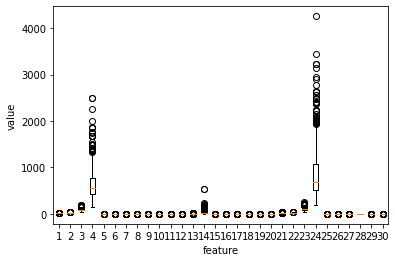

In [7]:
# 4. 박스 플롯의 특성의 사분위 관찰하기

import matplotlib.pyplot as plt

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [10]:
# 4. 눈에 띄는 특성 살펴보기 -> 4,14,24 이 눈에 띔

cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [14]:
# 5. 타깃 데이터 확인하기 -> 어차피 cancer.target 배열에는 0/1만 

import numpy as np

# return_counts=True : 고유한 값이 등장하는 횟수를 세어서 반환

np.unique(cancer.target, return_counts=True) # unique() 고유한 값을 찾아 반환해주는 함수

# 212 - 음성 클래스 / 357 - 양성 클래스

(array([0, 1]), array([212, 357]))

In [15]:
# 6. 훈련 데이터 세트 저장하기

x = cancer.data
y = cancer.target

# 여기까지가 훈련 데이터 준비 -- 

In [17]:
# 모델의 성능 평가를 위해서 훈련 데이터 나누기

# 1. train_test_splot() 함수를 활용해서 세트 나누기

from sklearn.model_selection import train_test_split

# 이 함수는 기본적으로 훈련 세트 75% 테스트 세트 25% 의 비율로 나눠줌

In [22]:
# 2. 입력데이터 = x, 타깃 데이터 = y 그밖의 설정을 매개변수로 설정

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

# stratify=y : 훈련 데이터를 나눌 때 클래스 비율을 동일하게 하는데, 일부 클래스 비율이 불균형한 경우

# test_size=0.2 : 훈련 데이터 비율은 조절하고 싶을 때 80:20

# random_state=42 : 데이터를 섞은 다음에 나눌 수 있도록 하는데 42번 섞고 나누도록 설정

print(x_train.shape, x_test.shape) # shape 배열의 크기 확인

(455, 30) (114, 30)


In [23]:
# 3. unique() -> 훈련 세트의 타깃 확인

np.unique(y_train, return_counts=True) # 비율 구성이 거의 비슷함을 확인할 수 있음

(array([0, 1]), array([170, 285]))

In [25]:
# 로지스틱 회귀 구현 !!!

# 1) 정방향으로 데이터가 흘러가는 과정
# 2) 가중치 업데이트를 위해 역방향으로 데이터가 흘러가는 과정 구현

# 앞서 배운 것과 함수가 거의 동일

class LogisticNeuron:
  
  def __init__(self):  # 가중치를 미리 초기화하지 않고 나중에 입력 데이터를 보고 특성 개수에 맞게 결정 
    self.w = None
    self.b = None

  def forpass(self, x): 
    z = np.sum(x * self.w) + self.b # 직선 방정식 계산
    return z

  def backprop(self, x, err):
    w_grad = x * err # 가중치에 대한 그레이디언트 계산
    b_grad = 1* err # 절편에 대한 그레이디언트 계산
    return w_grad, b_grad

In [26]:
# 훈련하는 메서드 구현하기 

# 1. fit() 메서드 구현하기 

def fit(self, x, y, epochs=100):
  self.w = np.ones(x.shape[1]) # 가중치 초기화
  self.b = 0 # 절편 초기화
  for i in range(epochs): # 에포크만큼 반복
    for x_i, y_i in zip(x,y ): # 모든 샘플에 대해 반복
      z = self.forpass(x_i) # 정방향 계산
      a = self.activation(z) # 활성화 함수 적용
      err = -(y_i - a) # 오차 계산
      w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
      self.w -= w_grad # 가중치 업데이트
      self.b -=b_grad # 절편 업데이트  


In [27]:
# 2. activation() 구현하기

def activation(self, z):
  a =1/(1+np.exp(-z)) # 시그모이드 계산
  return a 

# np.exp() 자연 상수의 지수 함수 계산

In [28]:
# 예측하는 메서드 구현하기

# 1. predict() 구현하기 - 새로운 샘플에 대한 예측값 계산

# 예측값) 입력값 -> 선형함수 -> 활성화 함수 -> 임계함수

def predict(self, x):
  z = [self.forpass(x_i) for x_i in x] # 선형 함수
  a = self.activation(np.array(z)) # 활성화 함수
  return a > 0.5 # 계단 함수 

In [35]:
class LogisticNeuron:
  
  def __init__(self):  # 가중치를 미리 초기화하지 않고 나중에 입력 데이터를 보고 특성 개수에 맞게 결정 
    self.w = None
    self.b = None

  def forpass(self, x): 
    z = np.sum(x * self.w) + self.b # 직선 방정식 계산
    return z

  def backprop(self, x, err):
    w_grad = x * err # 가중치에 대한 그레이디언트 계산
    b_grad = 1* err # 절편에 대한 그레이디언트 계산
    return w_grad, b_grad

 # 1. fit() 메서드 구현하기 

def fit(self, x, y, epochs=100):
  self.w = np.ones(x.shape[1]) # 가중치 초기화
  self.b = 0 # 절편 초기화
  for i in range(epochs): # 에포크만큼 반복
    for x_i, y_i in zip(x,y ): # 모든 샘플에 대해 반복
      z = self.forpass(x_i) # 정방향 계산
      a = self.activation(z) # 활성화 함수 적용
      err = -(y_i - a) # 오차 계산
      w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
      self.w -= w_grad # 가중치 업데이트
      self.b -=b_grad # 절편 업데이트  

 # 2. activation() 구현하기

def activation(self, z):
  a =1/(1+np.exp(-z)) # 시그모이드 계산
  return a 

# 예측하는 메서드 구현하기

def predict(self, x):
  z = [self.forpass(x_i) for x_i in x] # 선형 함수
  a = self.activation(np.array(z)) # 활성화 함수
  return a > 0.5 # 계단 함수 

neuron = LogisticNeuron()
neuron.fit(x_train, y_train) # 왜 오류?? 

np.mean(neuron.predict(x_test)==(y_test))


AttributeError: ignored

In [34]:
# 로지스틱 회귀 모델 훈련시키기

# 1. 모델 훈련하기

neuron = LogisticNeuron()
neuron.fit(x_train, y_train) # 왜 오류?? 


AttributeError: ignored

In [33]:
# 2. 테스트 세트 사용해 모델의 정확도 평가하기

np.mean(neuron.predict(x_test)==(y_test))

AttributeError: ignored